In [129]:
import pickle

In [130]:
from google.colab import drive

In [131]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [133]:
house=pd.read_csv("/content/drive/My Drive/Dataset/House_Price(ML).csv")

In [134]:
house.head()

,Size (sqft),Bedrooms,Price ($1000)
0,2126,2,564.50
1,2459,5,703.00
2,1860,2,456.75
3,2294,1,512.17
4,2130,4,599.56


In [135]:
house.columns

Index(['Size (sqft)', 'Bedrooms', 'Price ($1000)'], dtype='object')

In [136]:
house.shape

(120, 3)

In [137]:
house.isnull().sum()

,0
Size (sqft),0
Bedrooms,0
Price ($1000),0


In [138]:
house.rename(columns={"Size (sqft)":"size","Price ($1000)":"price"},inplace=True)

In [139]:
house.columns

Index(['size', 'Bedrooms', 'price'], dtype='object')

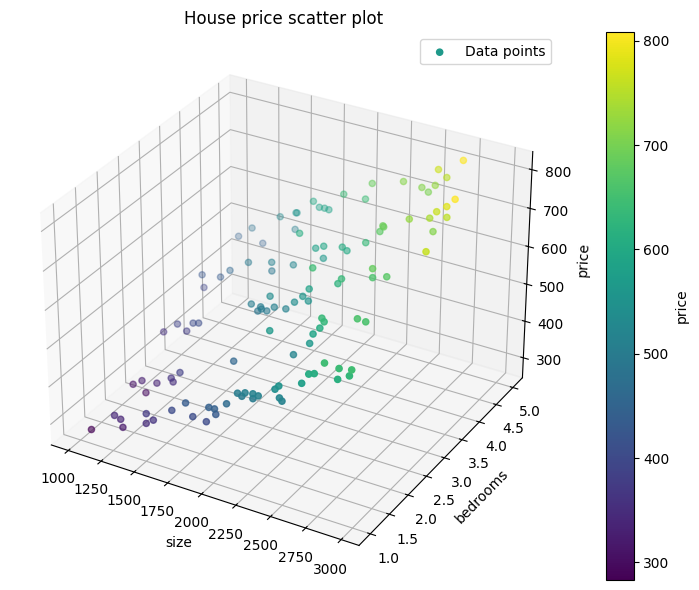

In [140]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection="3d")
scatter=ax.scatter(house["size"],house["Bedrooms"],house["price"],c=house["price"],cmap="viridis",label="Data points")
ax.set_xlabel("size")
ax.set_ylabel("bedrooms")
ax.set_zlabel("price")
ax.set_title("House price scatter plot")
plt.colorbar(scatter,ax=ax,label="price")
plt.tight_layout()
plt.legend()
plt.show()

In [141]:

import plotly.express as px
# 3D Scatter plot
fig = px.scatter_3d(house, x=house["size"], y=house["Bedrooms"], z=house["price"],
                    color=house["price"], title='House price scatter plot')
fig.show()

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(house[["size","Bedrooms"]],house["price"],test_size=0.2,random_state=42)

In [143]:
x_train.head()

,size,Bedrooms
42,2705,5
12,1330,1
15,2396,4
114,2016,1
76,2390,4


In [144]:
y_train.head()

,price
42,808.08
12,316.56
15,687.83
114,442.37
76,690.12


In [145]:
x_train.shape

(96, 2)

In [146]:
y_train.shape

(96,)

In [147]:
x_test.shape

(24, 2)

In [148]:
y_test.shape

(24,)

In [149]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [150]:
x_train_scaled

array([[ 1.23592594,  1.39717653],
       [-1.14560807, -1.35418649],
       [ 0.7007303 ,  0.70933578],
       [ 0.0425609 , -1.35418649],
       [ 0.69033815,  0.70933578],
       [ 0.88086087, -1.35418649],
       [ 0.90684124, -0.66634573],
       [ 0.84275633, -1.35418649],
       [-0.38524921,  0.02149502],
       [ 1.4784094 ,  0.70933578],
       [ 0.92935756,  1.39717653],
       [-0.92910498, -0.66634573],
       [-1.2391374 , -0.66634573],
       [ 1.0367431 ,  1.39717653],
       [-0.47185045,  1.39717653],
       [-1.50760124,  1.39717653],
       [ 0.59854084,  0.02149502],
       [ 0.77174331, -0.66634573],
       [-1.29975827,  0.70933578],
       [ 0.38723382, -1.35418649],
       [-0.50129487, -1.35418649],
       [ 0.19497908, -1.35418649],
       [ 0.17939085,  0.70933578],
       [ 0.05814912, -1.35418649],
       [-1.69465991,  1.39717653],
       [-0.89619651,  1.39717653],
       [-0.52900726,  1.39717653],
       [-1.280706  ,  0.02149502],
       [ 0.22788755,

In [151]:
np.round(x_train.describe(),2)

,size,Bedrooms
count,96.00,96.00
mean,1991.43,2.97
std,580.39,1.46
min,1013.00,1.00
25%,1470.25,1.75
50%,2020.50,3.00
75%,2488.50,4.00
max,2966.00,5.00


In [152]:
np.round(x_train_scaled.mean(),2)

np.float64(0.0)

In [153]:
np.round(x_train_scaled.std(),2)

np.float64(1.0)

In [154]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [155]:
model.coef_[0]

np.float64(116.71647845847018)

In [156]:
model.coef_[1]

np.float64(71.72911085472103)

In [157]:
model.coef_[[0,1]]

array([116.71647846,  71.72911085])

In [158]:
model.intercept_

np.float64(545.4559375)

In [159]:
y_test

,price
44,501.14
47,299.11
4,599.56
55,638.30
26,434.38
64,520.67
73,583.21
10,553.45
40,560.69
107,613.68


In [160]:
y_prad=model.predict(x_test_scaled)
y_prad

array([487.88191743, 335.4442397 , 624.3492848 , 613.24289814,
       410.63402366, 559.4328965 , 577.24697701, 539.45602112,
       565.30759934, 629.16447312, 588.93546346, 516.3858891 ,
       498.16749694, 497.58539715, 730.49327805, 552.97609387,
       509.48822328, 524.86425001, 630.98387556, 648.36927672,
       375.47109353, 445.00051433, 487.25108226, 552.78612189])

In [161]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [162]:
mean_absolute_error(y_test,y_prad)

18.49859807528348

In [163]:
mean_squared_error(y_test,y_prad)

514.5755432784739

In [164]:
r2_score(y_test,y_prad)

0.9388153783546871

In [166]:
import pickle as pkl

In [165]:

size=float(input("Enter your house size:"))
bedroom=int(input("Enter number of bedroom:"))
user_input_data=pd.DataFrame([[size,bedroom]],columns=["size","Bedrooms"])
scale_data=scaler.transform(user_input_data)
y=model.predict(scale_data)
print("your house price:$",y*1000)

Enter your house size:34
Enter number of bedroom:2
your house price:$ [101954.2590173]


In [167]:
with open("house_price.pkl","wb") as file:
    pkl.dump(model,file)

In [169]:
from google.colab import files
files.download("house_price.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>